<h1>Intro to Computer Music, Lab06-extension</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. learn how to generate "bitwise-operation music"
2. learn basic AM & FM synthesis techiques 
3. New: learn basic spectral manipulation

<h2> Load packages </h2>


In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from __future__ import print_function
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
 # use the print() function from Python3

<h2>Recap: </h2>
<h3>A pure sine wave </h3>


In [2]:
# create a sine wave from scratch 
# try to modify some parameters
A = 1;
f = 440;
#f = 440 * 11
phi = 0;
sr = 44100;
#sr = 4410
T = 5;
y = [A * sin(2*pi*f*t + phi) for t in arange(0.,T,1./sr)]
# write it as a function
def cos_wave(A, f, t, sr):
    return [A * cos(2*pi*f*t) for t in arange(0.,t,1./sr)]
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio


<h3> Intentional aliasing </h3>

In [3]:
f0 = 300;
ratio = 2
ratio = 2**(1./7)
yy = []
for i in range(0,1000):
    y = cos_wave(random(), f0 * (ratio**i), random(), 300.)
    #print(i,f0 * (ratio**i))
    yy = yy + y



In [4]:
IPython.display.Audio(data=yy, rate=4410) 

<h3>Bitwise-operation music</h3>
<h4>The building block: t & t >> 8, see more at https://youtu.be/qlrs2Vorw2Y </h4>

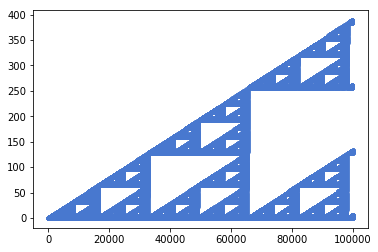

In [5]:
wave = [x & x >> 8 for x in range(100000)]
plt.plot(wave,'.')
plt.show()
#IPython.display.Audio(data=wave, rate=4410) # press the "play" button to hear audio

It sounds a little different from the online examples, right? 
This audio display funciton probably automatically scaled the signal from 0 to 1. In order to mimic the online examples, we can do:

In [6]:
Max_value = 0.99
wave = [min(x & x >> 8, Max_value) for x in range(100000)]
IPython.display.Audio(data=wave, rate=4410) # press the "play" button to hear audio

Now, you can save this audio file. Be sure to put "array" operation here and to use the same sample rate you used to create the wave.

<h2>Basic AM synthesis</h2>


In [7]:
sr = 44100
# A pure sine wave
Fc = 440
gmin =  [sin(2*pi*Fc*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [8]:
# get rid of the clip
sr = 44100
# A pure sine wave
Fc = 440
gmin =  [sin(2*pi*Fc*n) * exp(-5*n) for n in arange(0.,6.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [9]:
sr = 44100
# A ring sound
Fc = 440
Fm = 660
gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio

In [311]:
sr = 44100
# A ring sound
Fc = 440
x = []
Fm = 440
for i in range(1,4):
    Fc = Fm *i
    Fm = Fc/(2**i)
    gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) * exp(-5*n) for n in arange(0.,1,1./44100)]
    x += gmin
Fc = Fc * (2**(1/12))
Fm = Fm* (2**(1/12))

for i in range(1,4):
    Fc = Fm *i
    Fm = Fc/(2**i)
    gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) * exp(-5*n) for n in arange(0.,1,1./44100)]
    x += gmin
Fc = 2200
Fm = 2200/10
# gmin =  [sin(2*pi*Fc*n) * sin(2*pi*Fm*n) * exp(-5*n) for n in arange(0.,1.3,1./44100)]
IPython.display.Audio(data=x, rate=sr) # press the "play" button to hear audio

<h2>Basic FM synthesis</h2>


In [11]:
# a normal vibrato
Fm = 1
index = 100
gmin1 =  [cos(2*pi*440*n + index * cos(2*pi*Fm*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin1, rate=sr) # press the "play" button to hear audio


In [12]:
# simple FM where C = M
gmin1 =  [cos(2*pi*440*n + 4 * cos(2*pi*440*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin1, rate=sr) # press the "play" button to hear audio


In [234]:
# increasing the depth over time: brass sound
gmin1 =  [sin(2*pi*440*n +  sin(2*pi*440*(n**2))) for n in arange(0.,8.,1./4410)]
IPython.display.Audio(data=gmin1, rate=4410) # press the "play" button to hear audio

In [14]:
# Let's try something crazy
Fm = 886;
gmin2 =  [cos(2*pi*440*n + index * cos(2*pi*Fm*n)) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin2, rate=sr) # press the "play" button to hear audio

<h2>Some AM + FM synthesis examples</h2>


In [76]:
# FM + AM
Fm = 440;
gmin2 =  [cos(2*pi*440*n + (exp(n)) * cos(2*pi*Fm*n)) * sin(2*pi*443*n) for n in arange(0.,2.,1./44100)]
IPython.display.Audio(data=gmin2, rate=sr) # press the "play" button to hear audio

In [77]:
# Envelopes matter a lot!!! 
Fm = 886;
gmin2 =  [cos(2*pi*440*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,2.,1./44100)]
gmin3 = gmin2[::-1]
IPython.display.Audio(data=gmin3, rate=sr) # press the "play" button to hear audio

In [195]:
# a naive attempt to re-create human voice
Fc = 600
Fm = Fc * 0.25
Fa = 6
index = 5
gmin1 =  [cos((2*pi*Fc*n) + 3.4 * cos(2*pi*Fm*n)) * (sin(2*pi*Fa*n) + 18) for n in arange(0.,2.,1./44100)]
gmin2 =  [cos((2*pi*Fc*4*n) + 9 * cos(2*pi*Fm*n)) * (sin(2*pi*Fa*n) + 2) for n in arange(0.,2.,1./44100)]
gmin = add(gmin1, gmin2)
IPython.display.Audio(data=gmin, rate=sr) # press the "play" button to hear audio





<h2>Basic spectral manipulation:</h2>



/home/kenton/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


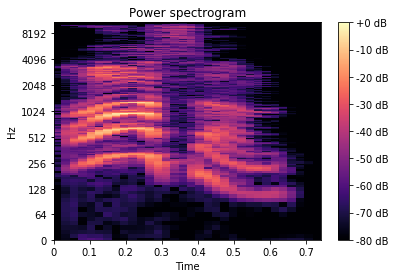

In [322]:
# a lazy copy from librosa doc
y, sr = librosa.load('./awesome.wav')
D = librosa.stft(y)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [323]:
# convert it back using i-stft
y, sr = librosa.load('./awesome.wav')
D = librosa.stft(y)
y_hat = librosa.istft(D)
IPython.display.Audio(data=y_hat, rate=sr) # press the "play" button to hear audio


In [324]:
# decompose it into mag and phase, and then combine them
magnitude, phase = librosa.magphase(D)
#D_hat = magnitude * phase
D_hat = np.multiply(magnitude,phase)
print(type(magnitude))
print("size: ",magnitude.size)
print("ndim: ",magnitude.ndim)
print("shape: ",magnitude.shape)
y_hat = librosa.istft(D_hat)
IPython.display.Audio(data=y_hat, rate=sr) # press the "play" button to hear audio


<class 'numpy.ndarray'>
size:  32800
ndim:  2
shape:  (1025, 32)


In [325]:
# magnitude = magnitude * np.random.rand(1025, 32)
magnitude, phase = librosa.magphase(D)
# magnitude = (magnitude.transpose() * np.arange(1025)).transpose()
# magnitude = (magnitude.transpose() * np.array([0.90**n for n in arange(1025)])).transpose()

# D_hat = np.multiply(magnitude,phase)
# librosa.display.specshow(librosa.amplitude_to_db(D_hat, ref=np.max), y_axis='log', x_axis='time')
# plt.title('Power spectrogram')
# plt.colorbar(format='%+2.0f dB')
# plt.show()
# y_hat = librosa.istft(D_hat)
# m = np.empty([1025,32])
m = np.empty([15872])
for i in range(10):
    magnitude = (magnitude.transpose() * np.array([1.1**i for n in arange(1025)])).transpose()
    D_hat = np.multiply(magnitude,phase)
    y_hat = librosa.istft(D_hat)
    m = np.append(m,y_hat)
# magnitude, phase = librosa.magphase(D)
# D_hat = np.multiply(magnitude,phase)
# y_hat = librosa.istft(D_hat)
# y_hat = librosa.effects.time_stretch(y_hat,0.5)
# m = np.append(m,y_hat)
y_hat = librosa.effects.time_stretch(y_hat,0.5)
m = np.append(m,y_hat)
y_hat = librosa.effects.time_stretch(y_hat,0.5)
m = np.append(m,y_hat)
# x = np.empty([15872])
for n in range(1,20):
    new = librosa.effects.time_stretch(y_hat,1.5*n)
    m = np.append(m,new)
# m = np.append(m,new)
# m = y_hat
IPython.display.Audio(data=m, rate=sr) # press the "play" button to hear audio

<h2> Group Project </h2>
<h3> Please add spectral manipulation into your final project</h3>
<h3> Submission: the code, the final sound, and a brief description on what techniques you used in order to create what sound effect</h3>
<h3> Presentation: you will be presenting your work in the coming Labs. Please prepare your talks</h3>



In [342]:
# Envelopes matter a lot!!! 
Fm = 440
song= []
for i in range(1,30):
    Fm *= 2**(1/12)
    #Envelope changed, AM is exp(-5*n)
    #The first exp(-4*n) causes exponential decay 
    gmin2 =  [cos(2*pi*Fm*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,.5,1./44100)]
#     gmin3 = gmin2[::-1]# press the "play" button to hear audio
    song += gmin2
song += song[::-1]
Fm = 440;
song = np.array(song)
song = librosa.effects.time_stretch(song,6)
gmin2 =  [cos(2*pi*440*n + (exp(n)) * cos(2*pi*Fm*n)) * sin(2*pi*443*n) for n in arange(0.,8.,1./44100)]
song = np.append(song,gmin2)
# Envelopes matter a lot!!! 
Fm = 4040;
#Envelope changed, AM is exp(-5*n)
#The first exp(-4*n) causes exponential decay 
gmin2 =  [cos(2*pi*440*n + exp(-.25
                               *n) * cos(2*pi*Fm*n)) * exp(-10*n) for n in arange(0.,2.,1./44100)]
song = np.append(song,gmin2)

# wave = [min((x & x >> 6),1) for x in range(1000000)]
# song += wave
Fm = 2040;
beat = []
#Envelope changed, AM is exp(-5*n)
#The first exp(-4*n) causes exponential decay 
# gmin2 =  [cos(2*pi*440*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,2.,1./44100)]
for i in range(1,20):
    gmin2 =  [cos(2*pi*440*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,1/i,1./44100)]
    beat += gmin2
    
song = np.append(song,beat)

# song += beat
# y, sr = librosa.load('./clapping-1.wav')
# D = librosa.stft(y)
# y_hat = librosa.istft(D)
# song = np.append(song,y_hat)
# IPython.display.Audio(data=y_hat, rate=sr)
song = np.append(song,m)
# new = librosa.effects.time_stretch(song,1.5*n)
IPython.display.Audio(data=song, rate=sr)